# Tutorial: Peptide and Fragment DataFrames

We use dataframe, a tabular-like data structure to represent peptides and fragments. The dataframe structure is easy to read from human's perspective, and efficient for input and output from machine's perspective.

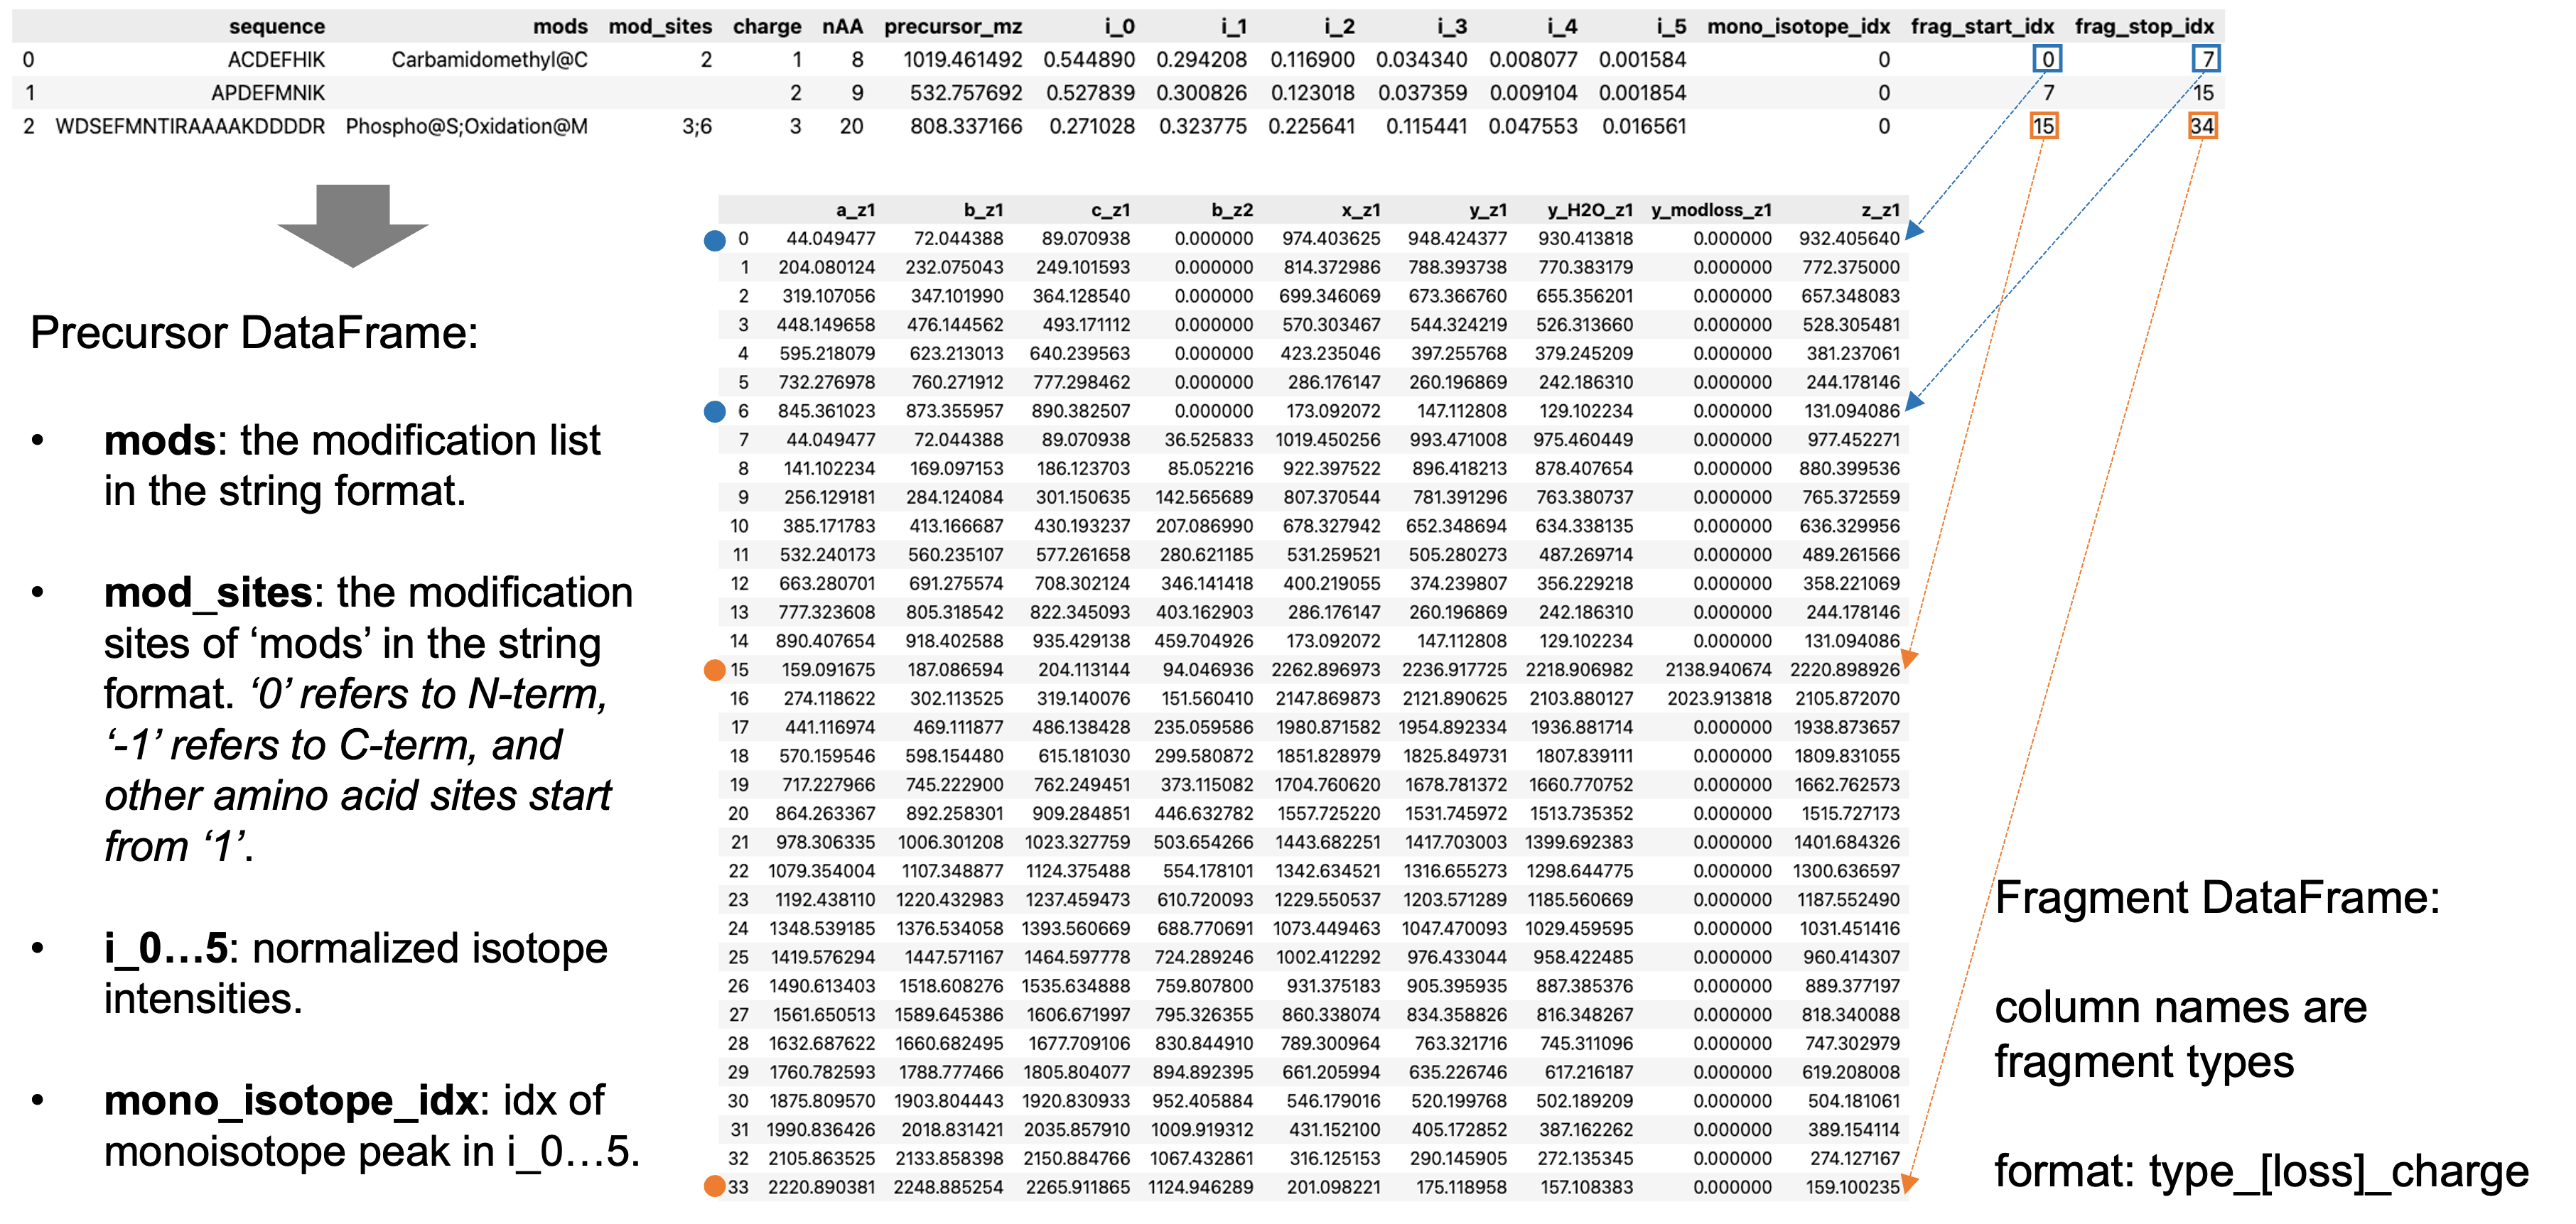

In [1]:
from IPython.display import Image
Image(filename='peptide-fragment-dataframe.png')

## Peptide DataFrame

Peptide dataframe must contain four columns: 
 - `sequence` for animo acid sequence (str);
 - `mods` for modification names (str, separated by `;`);
 - `mod_sites` for modification sites (str, separated by `;`);
 - `charge` for precursor charge states (int).

Other columns like `precursor_mz` can be flexibly added into the dataframe if necessary; and AlphaBase provides functionalities to calculate other columns like `precursor_mz` and isotopes.

In [2]:
import pandas as pd

df = pd.DataFrame({
    'sequence': ['ACDEFHIK', 'APDEFMNIK', 'WDSEFMNTIRAAAAKDDDDR'],
    'mods': ['Carbamidomethyl@C', '', 'Phospho@S;Oxidation@M'],
    'mod_sites': ['2', '', '3;6'],
    'charge': [1,2,3],
})
df

,sequence,mods,mod_sites,charge
0,ACDEFHIK,Carbamidomethyl@C,2,1
1,APDEFMNIK,,,2
2,WDSEFMNTIRAAAAKDDDDR,Phospho@S;Oxidation@M,3;6,3


## Fragment DataFrame

Fragment is also orginized in dataframe structure. The column names of the dataframe represent the fragment type, wich schema `Type[_LossType]_zn`, where:
  - `Type` can be `b,y,c,z`
  - `_LossType` can be `_modloss`, `_H2O`, or `_NH3`, this is optional.
  - `zn` is the charge state, for example `z1`.

Here are some examples:

In [3]:
from alphabase.peptide.fragment import create_fragment_mz_dataframe
frag_mz_df = create_fragment_mz_dataframe(
    df,
    charged_frag_types=['a_z1','b_z1','c_z1','b_z2','x_z1','y_z1', 'y_H2O_z1','y_modloss_z1','z_z1']
)
frag_mz_df

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,a_z1,b_z1,c_z1,b_z2,x_z1,y_z1,y_H2O_z1,y_modloss_z1,z_z1
0,44.049477,72.044388,89.070938,0.000000,974.403625,948.424377,930.413818,0.000000,932.405640
1,204.080124,232.075043,249.101593,0.000000,814.372986,788.393738,770.383179,0.000000,772.375000
2,319.107056,347.101990,364.128540,0.000000,699.346069,673.366760,655.356201,0.000000,657.348083
3,448.149658,476.144562,493.171112,0.000000,570.303467,544.324219,526.313660,0.000000,528.305481
4,595.218079,623.213013,640.239563,0.000000,423.235046,397.255768,379.245209,0.000000,381.237061
5,732.276978,760.271912,777.298462,0.000000,286.176147,260.196869,242.186310,0.000000,244.178146
6,845.361023,873.355957,890.382507,0.000000,173.092072,147.112808,129.102234,0.000000,131.094086
7,44.049477,72.044388,89.070938,36.525833,1019.450256,993.471008,975.460449,0.000000,977.452271
8,141.102234,169.097153,186.123703,85.052216,922.397522,896.418213,878.407654,0.000000,880.399536
9,256.129181,284.124084,301.150635,142.565689,807.370544,781.391296,763.380737,0.000000,765.372559


Note that all N-term (a/b/c) fragment mz values are in ascending order, e.g. from b[1] to b[n-1]; and all C-term (x/y/z) fragments are in descending order, e.g. from y[n-1] to y[1].

The fragment dataframe is connected to the peptide (precursor) dataframe by `frag_start_idx` and `frag_stop_idx` in the peptide dataframe. These two values can locate all fragments in the fragment dataframe of a peptide, as shown in the figure.

In [4]:
df

,sequence,mods,mod_sites,charge,nAA,frag_start_idx,frag_stop_idx
0,ACDEFHIK,Carbamidomethyl@C,2,1,8,0,7
1,APDEFMNIK,,,2,9,7,15
2,WDSEFMNTIRAAAAKDDDDR,Phospho@S;Oxidation@M,3;6,3,20,15,34


In [5]:
pep_id = -1 # last peptide
start = df['frag_start_idx'].values[pep_id]
stop = df['frag_stop_idx'].values[pep_id]
frag_mz_df.iloc[start:stop]

,a_z1,b_z1,c_z1,b_z2,x_z1,y_z1,y_H2O_z1,y_modloss_z1,z_z1
15,159.091675,187.086594,204.113144,94.046936,2262.896973,2236.917725,2218.906982,2138.940674,2220.898926
16,274.118622,302.113525,319.140076,151.560410,2147.869873,2121.890625,2103.880127,2023.913818,2105.872070
17,441.116974,469.111877,486.138428,235.059586,1980.871582,1954.892334,1936.881714,0.000000,1938.873657
18,570.159546,598.154480,615.181030,299.580872,1851.828979,1825.849731,1807.839111,0.000000,1809.831055
19,717.227966,745.222900,762.249451,373.115082,1704.760620,1678.781372,1660.770752,0.000000,1662.762573
20,864.263367,892.258301,909.284851,446.632782,1557.725220,1531.745972,1513.735352,0.000000,1515.727173
21,978.306335,1006.301208,1023.327759,503.654266,1443.682251,1417.703003,1399.692383,0.000000,1401.684326
22,1079.354004,1107.348877,1124.375488,554.178101,1342.634521,1316.655273,1298.644775,0.000000,1300.636597
23,1192.438110,1220.432983,1237.459473,610.720093,1229.550537,1203.571289,1185.560669,0.000000,1187.552490
24,1348.539185,1376.534058,1393.560669,688.770691,1073.449463,1047.470093,1029.459595,0.000000,1031.451416


Using on several fragment dataframes (e.g., m/z and intensity dataframes) may be not convinient in some situations, especially when we need to operate subsets of the dataframes. Therefore, alphabase also provides a flattened fragment dataframe strucutre to store all fragment information.

In [6]:
from alphabase.peptide.fragment import flatten_fragments
import numpy as np

precursor_df, flat_frag_df = flatten_fragments(
    precursor_df=df, 
    fragment_mz_df=frag_mz_df, 
    fragment_intensity_df=pd.DataFrame(
        np.zeros_like(frag_mz_df.values),
        columns=frag_mz_df.columns
    )
)

In [7]:
precursor_df

,sequence,mods,mod_sites,charge,nAA,frag_start_idx,frag_stop_idx,flat_frag_start_idx,flat_frag_stop_idx
0,ACDEFHIK,Carbamidomethyl@C,2,1,8,0,7,0,49
1,APDEFMNIK,,,2,9,7,15,49,113
2,WDSEFMNTIRAAAAKDDDDR,Phospho@S;Oxidation@M,3;6,3,20,15,34,113,267


In [8]:
flat_frag_df

,mz,intensity,type,loss_type,charge,number,position
0,44.049477,0.0,97,0,1,1,0
1,72.044388,0.0,98,0,1,1,0
2,89.070938,0.0,99,0,1,1,0
3,974.403625,0.0,120,0,1,7,0
4,948.424377,0.0,121,0,1,7,0
...,...,...,...,...,...,...,...
262,1124.946289,0.0,98,0,2,19,18
263,201.098221,0.0,120,0,1,1,18
264,175.118958,0.0,121,0,1,1,18
265,157.108383,0.0,121,18,1,1,18


For the flattened fragment dataframe, it contains `mz`, `intensity`, `type`, `loss_type`, `charge`, `number`, and `position` columns, other columns can be flexibly added. All columns are converted to numeric values for better processing in numpy and numba package. For instance , `type` is the ASCII code of `abc/xyz` ions, `a`=97, `b`=98, `c`=99, `x`=120, `y`=121, and `z`=122. Losses are also converted to numbers as well, therefore, Water loss becomes `18`, and phospho loss becomes `98`. 

And similar to `frag_start_idx` and `frag_stop_idx`, we use `flat_frag_start_idx` and `flat_frag_stop_idx` to keep the connection between the precursor dataframe and the flattened fragment dataframe.